## Environment prep

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

## Load data

In [25]:
# Specify the path to your main folder
main_folder_path = '/content/drive/MyDrive/Wifi_Exercise_Dataset/segments'

# Initialize an empty dictionary to store lists of DataFrames for each activity
activity_dataframes = {}

# Iterate through subfolders
for activity_folder in os.listdir(main_folder_path):
   #if activity_folder == "RL":
    #      continue
    activity_folder_path = os.path.join(main_folder_path, activity_folder)

    # Check if it's a directory
    if os.path.isdir(activity_folder_path):
        # Initialize an empty list to store DataFrames for each file in the subfolder
        file_dataframes = []

        # Iterate through files in the subfolder
        for file_name in os.listdir(activity_folder_path):
            if file_name.endswith('.csv'):
                file_path = os.path.join(activity_folder_path, file_name)

                # Read the data from each CSV file into a DataFrame
                df = pd.read_csv(file_path)  # Adjust the read_csv parameters based on your file format
                file_dataframes.append(df)

        # Append the list of DataFrames for the activity to the dictionary
        activity_dataframes[activity_folder] = file_dataframes

In [4]:
print(activity_dataframes['LL'])

[     Unnamed: 0          0    1          6          7          8          9  \
0            99  105.60303  4.0  10.774369   9.408298  11.918971   7.496360   
1           100  105.60303  4.0  10.904217  11.159260  10.467387  10.232231   
2           101  105.60303  4.0  11.681194  13.061838  12.156271  14.388350   
3           102  105.60303  4.0  13.270660  15.127727  14.047262  17.191660   
4           103  105.60303  4.0  13.145415  13.912987  13.166553  14.953131   
..          ...        ...  ...        ...        ...        ...        ...   
195         294  105.60303  4.0  20.766783  25.096428  25.512165  22.261938   
196         295  105.60303  4.0  21.040615  18.692790  23.911783  22.228926   
197         296  105.60303  4.0  20.093632  13.203671  19.244354  20.962626   
198         297  105.60303  4.0  22.066618  18.610765  21.734120  23.657473   
199         298  105.60303  4.0  36.669266  34.087566  39.525303  37.404907   

            10         11         12  ...         

## Append label to a list

In [27]:
labels = []

### JJ

In [14]:
label = 0
for df in activity_dataframes['JJ']:
  labels.append(label)
  df = df.drop('timestamp',axis=1,inplace=True)

In [ ]:
print(len(labels))

180


In [ ]:
print(activity_dataframes['JJ'][3])

     Unnamed: 0          0    1          6          7          8          9  \
0           639  105.60303  4.0   9.900033  12.229788  13.096763  14.360538   
1           640  105.60303  4.0   9.808481  12.634003  11.771914  12.944027   
2           641  105.60303  4.0  11.513002  13.398688  11.944472  12.863001   
3           642  105.60303  4.0  12.953764  14.534973  13.015095  11.409569   
4           643  105.60303  4.0  12.079850  13.233573  13.385474  11.527986   
..          ...        ...  ...        ...        ...        ...        ...   
195         834  105.60303  4.0  15.550500  16.766676  18.790983  19.237356   
196         835  105.60303  4.0  17.553123  16.548437  21.054565  19.302195   
197         836  105.60303  4.0  17.988436  16.722008  20.078234  18.325040   
198         837  105.60303  4.0  16.476871  16.462790  16.383009  16.833912   
199         838  105.60303  4.0  14.670599  16.747465  15.529696  16.240925   

            10         11         12  ...         4

### LA

In [ ]:
label = 1
for df in activity_dataframes['LA']:
  labels.append(label)
  df = df.drop('timestamp',axis=1,inplace=True)
print(activity_dataframes['LA'][3])

     Unnamed: 0          0    1          6          7          8          9  \
0           753  105.60303  4.0  19.864529  23.271317  24.343922  20.370834   
1           754  105.60303  4.0  18.593851  21.209877  22.641035  21.327581   
2           755  105.60303  4.0  18.836372  18.822212  21.444624  20.858180   
3           756  105.60303  4.0  18.145739  14.758698  16.843004  17.094376   
4           757  105.60303  4.0  18.397736  16.255814  17.421051  17.495293   
..          ...        ...  ...        ...        ...        ...        ...   
195         948  105.60303  4.0  13.659588  17.506956  17.680717  14.437332   
196         949  105.60303  4.0  20.808239  22.170074  24.099234  27.509115   
197         950  105.60303  4.0  24.494251  25.253954  27.615230  33.616417   
198         951  105.60303  4.0  23.215078  24.590158  26.236990  30.482939   
199         952  105.60303  4.0  14.058363  15.394942  16.319210  15.663834   

            10         11         12  ...        49

In [ ]:
print(len(labels))

326


### LL

In [28]:
label = 0
for df in activity_dataframes['LL']:
  labels.append(label)
  df = df.drop('timestamp',axis=1,inplace=True)
print(activity_dataframes['LL'][3])

     Unnamed: 0          0    1          6          7          8          9  \
0           699  105.60303  4.0  22.424746  24.140055  21.761314  20.657763   
1           700  105.60303  4.0  23.205828  23.932932  23.666155  22.617155   
2           701  105.60303  4.0  23.190435  22.912699  25.048096  24.562391   
3           702  105.60303  4.0  23.714030  22.773046  23.949392  24.261602   
4           703  105.60303  4.0  19.187973  21.222260  23.096550  23.540041   
..          ...        ...  ...        ...        ...        ...        ...   
195         894  105.60303  4.0  21.538229  26.177950  17.703087  18.509413   
196         895  105.60303  4.0  18.778212  18.055730  12.895945  12.752725   
197         896  105.60303  4.0  19.480520  14.400443  15.130207  14.929633   
198         897  105.60303  4.0  16.094881  18.196030  17.549190  17.152440   
199         898  105.60303  4.0  17.940968  20.270437  20.314474  20.359730   

            10         11         12  ...        49

### NA

In [29]:
label = 1
for df in activity_dataframes['NA']:
  labels.append(label)
  df = df.drop('timestamp',axis=1,inplace=True)
print(activity_dataframes['NA'][3])

     Unnamed: 0          0    1          6          7          8          9  \
0           619  105.60303  4.0  18.950860  21.774376  20.462631  20.631372   
1           620  105.60303  4.0  17.529757  20.321173  18.308523  20.951360   
2           621  105.60303  4.0  15.741918  14.487986  15.801046  17.756990   
3           622  105.60303  4.0  14.482962  22.028170  15.126639  16.003265   
4           623  105.60303  4.0  14.931985  25.980812  16.765005  16.120317   
..          ...        ...  ...        ...        ...        ...        ...   
195         814  105.60303  4.0  15.590273  18.770779  17.746357  19.006493   
196         815  105.60303  4.0  17.848309  18.567453  16.992632  20.314152   
197         816  105.60303  4.0  19.427568  18.282124  16.483849  20.450766   
198         817  105.60303  4.0  19.126139  18.548920  18.602175  20.402815   
199         818  105.60303  4.0  18.616055  18.465399  20.522675  20.924162   

            10         11         12  ...         4

### RA

In [30]:
label = 2
for df in activity_dataframes['RA']:
  labels.append(label)
  df = df.drop('timestamp',axis=1,inplace=True)
print(activity_dataframes['RA'][3])

     Unnamed: 0          0    1          6          7          8          9  \
0           613  105.60303  4.0  18.049316  19.446634  20.078840  20.515245   
1           614  105.60303  4.0  18.786957  20.008003  19.791199  22.185781   
2           615  105.60303  4.0  19.691784  20.039019  18.773478  23.349724   
3           616  105.60303  4.0  16.818628  18.293620  16.909420  20.266338   
4           617  105.60303  4.0  15.785582  16.838842  17.104807  18.524813   
..          ...        ...  ...        ...        ...        ...        ...   
195         808  105.60303  4.0  20.268316  22.281826  24.553093  25.357540   
196         809  105.60303  4.0  19.480446  21.170282  19.983915  22.321148   
197         810  105.60303  4.0  17.312607  17.938837  16.752740  19.619263   
198         811  105.60303  4.0  19.397966  17.994093  19.847273  19.787050   
199         812  105.60303  4.0  19.361770  17.055635  20.305439  19.061697   

            10         11         12  ...         4

### RL

In [9]:
label = 3
for df in activity_dataframes['RL']:
  labels.append(label)
  df = df.drop('timestamp',axis=1,inplace=True)
print(activity_dataframes['RL'][3])

     Unnamed: 0          0    1          6          7          8          9  \
0           752  105.60303  4.0  17.524916  17.189220  18.773100  18.908495   
1           753  105.60303  4.0  18.797579  17.977888  18.288600  19.516720   
2           754  105.60303  4.0  18.794374  17.759434  18.799725  18.676447   
3           755  105.60303  4.0  20.512156  20.497223  21.226679  21.205732   
4           756  105.60303  4.0  21.431078  22.402035  22.528494  23.851700   
..          ...        ...  ...        ...        ...        ...        ...   
195         947  105.60303  4.0  19.021578  14.730905  16.352444  21.181310   
196         948  105.60303  4.0  18.763910  15.245529  17.706581  21.386164   
197         949  105.60303  4.0  18.211008  18.019825  21.274181  17.702408   
198         950  105.60303  4.0  17.886600  18.061350  19.914124  17.161572   
199         951  105.60303  4.0  17.951420  17.786980  19.539650  18.131716   

            10         11         12  ...         4

### SO

In [31]:
label = 3
for df in activity_dataframes['SO']:
  labels.append(label)
  df = df.drop('timestamp',axis=1,inplace=True)
print(activity_dataframes['SO'][3])

     Unnamed: 0          0    1          6          7          8          9  \
0           695  105.60303  4.0  17.766068  16.753246  19.043830  17.250135   
1           696  105.60303  4.0  17.253891  17.755770  20.349852  18.987896   
2           697  105.60303  4.0  17.121721  19.084005  20.592781  20.385578   
3           698  105.60303  4.0  17.855999  19.798254  20.106117  20.319183   
4           699  105.60303  4.0  17.384260  17.409435  18.691807  18.094133   
..          ...        ...  ...        ...        ...        ...        ...   
195         890  105.60303  4.0  13.084739  13.835855  18.206610  14.915538   
196         891  105.60303  4.0  14.078163  15.227468  17.822508  16.328133   
197         892  105.60303  4.0  16.195026  17.246307  17.412453  18.798231   
198         893  105.60303  4.0  14.521529  14.985137  15.900641  17.381306   
199         894  105.60303  4.0  14.238336  15.659976  14.084876  18.014730   

            10         11         12  ...         4

## Form data array from dataframes

In [32]:
# Assuming activity_dataframes is the dictionary of lists of DataFrames
activity_arrays = {}

for activity, dataframes_list in activity_dataframes.items():
    # Combine DataFrames along a new axis
    if(activity == 'LL' or activity == 'RA' or activity == 'NA' or activity == 'SO'):
      activity_array = np.stack([df.values for df in dataframes_list])
      activity_arrays[activity] = activity_array

# Concatenate activity arrays along a new axis
dataset_array = np.concatenate(list(activity_arrays.values()), axis=0)

In [33]:
print(dataset_array.shape)

(705, 200, 55)


In [34]:
print(len(labels))

705


### CNN

In [35]:
from sklearn.model_selection import train_test_split
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(dataset_array, labels, test_size=0.3, random_state=42)

X_train = X_train.astype('float32')
X_train /= 255
X_test = X_test.astype('float32')
X_test /= 255

In [37]:
from sklearn.utils.class_weight import compute_class_weight

class_labels = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=class_labels, y=y_train)
print(class_weights)

[1.08114035 1.01859504 0.90625    1.0102459 ]


In [38]:
struggling_class_index = 1
class_weights[struggling_class_index] *= 2  # You can adjust the multiplier

In [ ]:
print(y_train)

[1 2 0 0 3 3 1 3 0 0 0 2 3 2 2 1 1 1 0 1 3 2 2 0 3 3 0 2 2 1 1 2 2 2 1 1 3
 3 3 0 1 3 2 3 3 0 3 3 2 1 1 2 0 0 3 3 1 0 0 0 2 3 2 3 3 1 0 0 0 0 0 0 1 3
 0 0 2 3 0 1 2 3 1 2 0 2 2 0 1 2 2 3 2 0 0 0 2 1 1 1 2 1 2 0 2 2 0 2 1 3 0
 1 0 1 1 2 3 3 3 1 2 0 2 3 3 1 3 1 0 0 3 0 2 1 1 1 0 3 0 0 3 1 0 3 1 2 1 1
 0 1 1 3 1 3 0 2 2 3 2 1 2 0 1 1 3 3 0 3 2 1 0 2 3 1 0 1 2 3 0 0 3 3 1 2 3
 3 1 1 3 0 0 2 1 0 0 3 1 3 0 1 0 2 0 2 2 1 1 2 1 0 0 3 1 1 0 3 0 2 0 3 1 1
 0 2 1 1 2 3 1 2 3 2 0 1 1 2 3 3 2 3 3 0 3 0 3 2 0 0 0 3 3 0 3 2 1 3 1 0 1
 2 1 0 3 1 0 2 1 0 0 1 3 2 2 0 3 2 2 1 3 3 2 2 3 3 3 3 0 2 0 3 0 1 1 3 2 2
 3 2 0 2 2 1 2 3 0 2 2 2 0 0 2 3 0 0 0 2 3 1 2 3 2 3 0 3 0 2 0 1 1 2 2 2 0
 0 3 2 3 1 3 1 2 2 0 2 3 2 3 1 3 1 3 0 0 2 2 2 1 1 1 2 0 2 3 2 2 2 3 0 3 1
 2 1 1 0 3 0 3 1 1 1 2 0 1 1 2 1 2 3 0 2 3 3 1 3 2 3 3 2 3 2 1 2 2 0 1 3 2
 1 3 1 2 3 1 1 1 2 2 1 3 3 2 1 2 3 3 3 3 3 0 1 0 2 0 2 0 3 3 3 0 3 1 3 2 3
 3 1 2 2 3 1 0 3 3 0 3 2 2 0 0 1 0 0 3 1 2 2 1 2 2 3 2 0 0 2 0 3 2 0 0 0 0
 2 2 1 1 0 1 1 1 2 2 3 1 

In [40]:
!pip show tensorflow

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl


In [55]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout,Attention
from tensorflow.keras.losses import SparseCategoricalCrossentropy


# Define the CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, 7, activation='relu' , input_shape=(200, 55,1)),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(96, 5, activation='relu'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(4, activation='softmax')

])

# Compile the model
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 194, 49, 32)       1600      
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 97, 24, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 93, 20, 96)        76896     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 46, 10, 96)        0         
 ng2D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 44160)             0         
                                                                 
 dense_27 (Dense)            (None, 128)              

In [56]:
class_weight = {0: 1.,
                1: 1.5,
                2: 1.,
                3: 1.}
history = model.fit(X_train, y_train, epochs=50, batch_size=8,validation_split=0.2,class_weight=class_weight)

Epoch 1/50
50/50 [==============================] - 18s 342ms/step - loss: 1.5733 - accuracy: 0.2335 - val_loss: 1.3838 - val_accuracy: 0.2424
Epoch 2/50
50/50 [==============================] - 17s 342ms/step - loss: 1.5464 - accuracy: 0.2868 - val_loss: 1.3905 - val_accuracy: 0.2424
Epoch 3/50
50/50 [==============================] - 17s 333ms/step - loss: 1.5532 - accuracy: 0.2614 - val_loss: 1.3755 - val_accuracy: 0.2424
Epoch 4/50
50/50 [==============================] - 16s 321ms/step - loss: 1.5393 - accuracy: 0.2690 - val_loss: 1.3572 - val_accuracy: 0.2424
Epoch 5/50
50/50 [==============================] - 17s 350ms/step - loss: 1.5222 - accuracy: 0.2893 - val_loss: 1.3320 - val_accuracy: 0.3333
Epoch 6/50
50/50 [==============================] - 17s 348ms/step - loss: 1.4483 - accuracy: 0.3909 - val_loss: 1.2420 - val_accuracy: 0.4848
Epoch 7/50
50/50 [==============================] - 17s 341ms/step - loss: 1.3457 - accuracy: 0.4315 - val_loss: 1.1609 - val_accuracy: 0.3838

### DNN

In [ ]:
import tensorflow as tf

# Define the DNN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(7, activation='softmax')
])

# Define the optimizer and loss function
optimizer = tf.keras.optimizers.SGD()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
flat = dataset_array.reshape(1176 * 200, 55)
print(flat.shape)

(235200, 55)


In [ ]:
all_labels = []
for key, dataframe_list in activity_dataframes.items():
    for dataframe in dataframe_list:
        # Append the label to the labels list for each row in the DataFrame
        for index, row in dataframe.iterrows():
            all_labels.append((key))

In [ ]:
print(all_labels)

['JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ', 'JJ

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
label_encoder = LabelEncoder()
all_labels = label_encoder.fit_transform(all_labels)

In [ ]:
from sklearn.model_selection import train_test_split

data = dataset_array
labels = np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
y_train = np.array(y_train)
print(y_train.shape)

(940,)


In [ ]:
import tensorflow as tf

flattened_data = tf.reshape(data, [-1, data.shape[1] * data.shape[2]])
one_hot_encoded_data = tf.keras.utils.to_categorical(flattened_data)
encoded_data = one_hot_encoded_data.reshape(data[0], data[1], -1)
print(encoded_data.shape)

In [ ]:
print(X_train.shape)

(940, 200, 55)


In [ ]:
history = model.fit(X_train, y_train, epochs=30, batch_size=128,validation_split=0.2)

Epoch 1/30


InvalidArgumentError: ignored

## Evaluation

In [57]:
%matplotlib inline
from sklearn.metrics import confusion_matrix, accuracy_score
import itertools
import matplotlib.pyplot as plt

In [58]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

7/7 [==============================] - 4s 485ms/step
Confusion matrix, without normalization
[[55  5  0  2]
 [ 3 48  5  3]
 [ 0  8 36  2]
 [ 0  1  0 44]]
Per class:  [0.88709677 0.81355932 0.7826087  0.97777778]


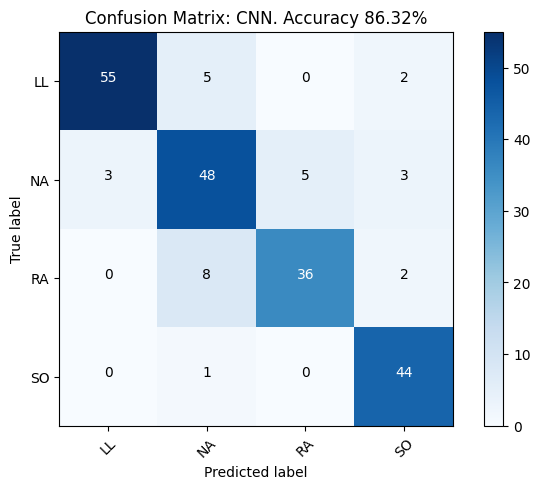

In [59]:
predictions = model.predict(X_test)

rounded_predictions = np.argmax(predictions, axis=-1)

cm_plot_labels = ['LL', 'NA' ,'RA', 'SO']
cm = confusion_matrix(y_true=y_test, y_pred=rounded_predictions)
accuracy = accuracy_score(y_test, rounded_predictions) * 100
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title=f'Confusion Matrix: CNN. Accuracy {accuracy:.02f}%')
print("Per class: ", cm.diagonal()/cm.sum(axis=1))

In [ ]:

model.save('/content/drive/MyDrive/Wifi_Exercise_Dataset/models/3act_94_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
